## Simple Linear Regression

#### Importing notebooks

In [7]:
%%capture
%run '01. Data Retrieval.ipynb'

#### Importing packages

In [3]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from math import sqrt

### 1. Define Training and Testing Sets

In [9]:
#size of training set: 90%
#size of testing set: 10%
train, test = train_test_split(data, test_size=0.1)

length = len(data)

x_train = train.search_volume.values.reshape(len(train), 1)
x_test = test.search_volume.values.reshape(len(test), 1)

y_train = train.bitcoin_price.values.reshape(len(train), 1)
y_test = test.bitcoin_price.values.reshape(len(test), 1)

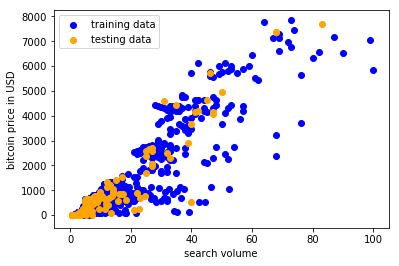

In [16]:
#create scatter plot
fig, ax = pyplot.subplots()
ax.scatter(x_train, y_train, color='blue', label = 'training data')
ax.scatter(x_test, y_test,  color='orange', label = 'testing data')
ax.legend(loc=2)
ax.set_xlabel(search_volume_title)
ax.set_ylabel(bitcoin_title)

### 2. Execute Simple Linear Regression

In [5]:
#execute simple linear regression
regression = linear_model.LinearRegression()
regression.fit(x_train, y_train)

#extract coefficient and intercept of linear model
coef = regression.coef_[0][0]
intercept = regression.intercept_[0]

print("coefficient: \t" + repr(round(coef,1)))
print("intercept: \t" + repr(round(intercept,1)))

coefficient: 	84.5
intercept: 	-125.2


In [6]:
#print entire linear model with coefficient and intercept
print("Mathematical equation for red fitting line:")
print("f(x) = "+repr(round(coef,1))+"*x"+repr(round(intercept,1)))

Mathematical equation for red fitting line:
f(x) = 84.5*x-125.2


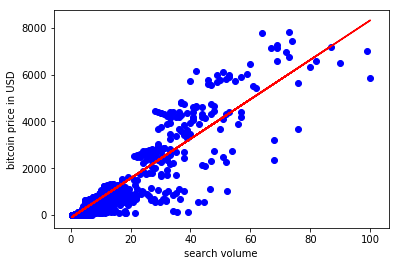

In [7]:
#plot scatterplot with training data and linear model
fig, ax = pyplot.subplots()
ax.plot(x_train, coef * x_train + intercept, color='red')
ax.scatter(x_train, y_train, color='blue')
ax.set_xlabel(search_volume_title)
ax.set_ylabel(bitcoin_title)

### 3. Predict Y Values with Testing Data

In [8]:
y_predict = regression.predict(x_test)

### 4. Calculate RMSE

In [9]:
rmse = sqrt(mean_squared_error(y_test, y_predict))
print(rmse)

431.86077948788653


### 5. Display Summarizing Plot

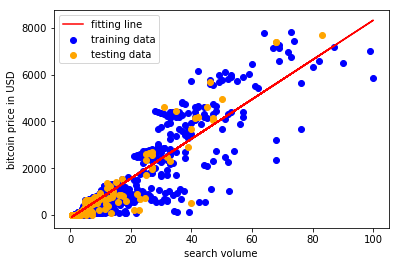

In [17]:
#plot training data, testing data, and linear model
fig, ax = pyplot.subplots()
ax.scatter(x_train, y_train, color='blue', label = 'training data')
ax.plot(x_train, coef * x_train + intercept, color='red', label = 'fitting line')
ax.scatter(x_test, y_test,  color='orange', label = 'testing data')
ax.legend(loc=2)
ax.set_xlabel(search_volume_title)
ax.set_ylabel(bitcoin_title)

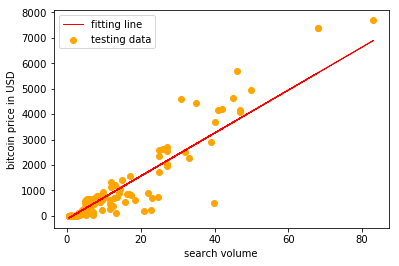

In [18]:
#plot testing data with linear model
fig, ax = pyplot.subplots()
ax.scatter(x_test, y_test,  color='orange', label = 'testing data')
ax.plot(x_test, y_predict, color='red', linewidth=1, label = 'fitting line')
ax.legend(loc=0)
ax.set_xlabel(search_volume_title)
ax.set_ylabel(bitcoin_title)

In [34]:
(431.86/(7843.93-2.05))*100

5.507097787775381